# Arrosticini meets Deep Learning!

![classic arrosticino](main.jpg "Arrosticino")

__Arrosticini Abruzzesi__

    Arrosticini are a class of traditional Abruzzese cuisine from the Italian region of Abruzzo.[1] 
    Arrosticini (rustelle or arrustelle in the local dialects; also known as spiedini or spidducci) 
    are typically made from castrated sheep's meat (mutton), or lamb, cut in chunks and pierced 
    by a skewer. It is cooked on a brazier with a typically elongated shape, called canala as it 
    resembles a gutter.

credits: [Wikipedia](https://en.wikipedia.org/wiki/Arrosticini)


Often these are confused with another type of food called skewer (spiedino), our aim is to create a deep learning algorithm to help the user avoid confusion and be able to choose the right food with extreme care.

In this notebook we are going to see how to use a pretrained deep learning image classification architecutre, toward transfer learning methodology, to classify a new object category.


Part of the following code as been taken from [MachineLearningMastery.com](https://machinelearningmastery.com)

### Step 1a. Create the dataset

We are going to download images from google images using library __google_images_download__.

__NOTE__
If you don't want to downlad everything from the start, you can download the compressed dataset and jupt to __Step 1b__

All the downloaded images will be saved in the root in a "downloads" folder. As we have searched our examples using different keywords, additional subdirectories are created, each of which will contain all the images, in size and name of the original file.

This part is a bit boring, you need to move and rename all the images and save them in the correct structure.

In addition to renaming the images in the format <class_name>.<sequence_num>.<format>, we will resize them 224x224x3. You will discover later the reason for this choice, but perhaps someone has already guessed it ;)

In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments1 = {
    'keywords': 'arrosticino,arrosticini,rustelle',
    'limit': 1000,
    'print_urls': False,
    'chromedriver': '/usr/local/bin/chromedriver',
    'silent_mode': True
}
class1_paths = response.download(arguments1)

arguments2 = {
    'keywords': 'spiedino,spiedini,skewer',
    'limit': 1000,
    'print_urls': False,
    'chromedriver': '/usr/local/bin/chromedriver',
    'silent_mode': True
}
class2_paths = response.download(arguments2)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 613 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 563 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 439 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 726 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because so

We will now rename the image files and create the right directory structure:

root
 - test
    - arrosticino
    - spiedino
 - train
    - arrosticino
    - spiedino

Unfortunately google is not good at distinguishing the two categories, so I had to do a thorough cleaning of the dataset and I manually deleted about 50% of the downloaded images.

In [0]:
import os
from shutil import copyfile
import numpy as np

download_path = 'downloads'
train_path = 'train'
test_path = 'test'
labels1 = ['arrosticino', 'arrosticini', 'rustelle']
labels2 = ['spiedino', 'spiedini', 'skewer']

In [ ]:
from keras.preprocessing.image import load_img, save_img, img_to_array

for category in ['arrosticino', 'spiedino']:
    if not os.path.exists(os.path.join(train_path, category)):
        os.makedirs(os.path.join(train_path, category))
    if not os.path.exists(os.path.join(test_path, category)):
        os.makedirs(os.path.join(test_path, category))
        
i = 0
for l in labels1:
    for image in os.listdir(os.path.join(download_path, l)):
        filename, file_extension = os.path.splitext(image)
        try:
            img = img_to_array(load_img(download_path+'/'+l+'/'+image, target_size=(224,224)))
            if i < 400: save_img(test_path+'/arrosticino/arrosticino.'+str(i)+file_extension, img)
            else: save_img(train_path+'/arrosticino/arrosticino.'+str(i)+file_extension, img)
        except Exception as e:
            pass
        i += 1
        
i = 0
for l in labels2:
    for image in os.listdir(os.path.join(download_path, l)):
        filename, file_extension = os.path.splitext(image)
        try:
            img = img_to_array(load_img(download_path+'/'+l+'/'+image, target_size=(224,224)))
            if i < 400: save_img(test_path+'/spiedino/spiedino.'+str(i)+file_extension, img)
            else: save_img(train_path+'/spiedino/spiedino.'+str(i)+file_extension, img)
        except Exception as e:
            pass
        i += 1

### Step 1b. Extract the dataset from the zip file

In [0]:
from zipfile import ZipFile
with ZipFile('dataset.zip', 'r') as z:
    z.extractall()

Done! Now show some images

In [0]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

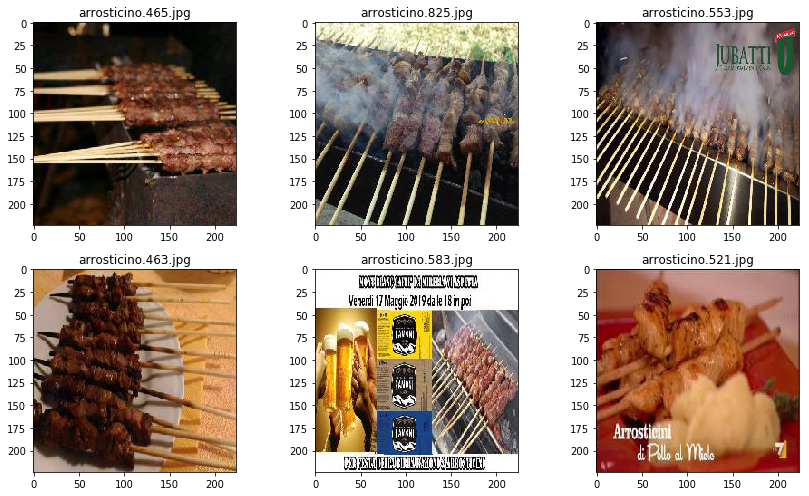

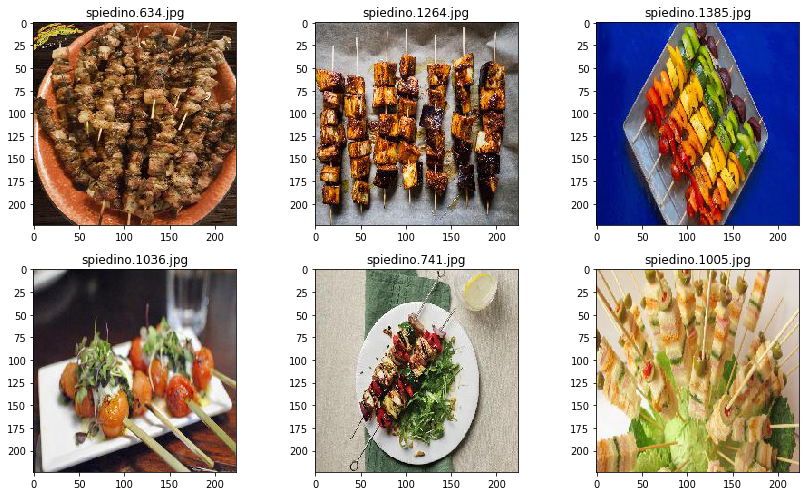

In [6]:
plt.figure(figsize=(12,7))
for i in range(6):
    plt.subplot(231 + i)
    filename = np.random.choice(os.listdir('train/arrosticino'))
    plt.title(filename)
    image = imread(os.path.join('train/arrosticino', filename))
    plt.imshow(image)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,7))
for i in range(6):
    plt.subplot(231 + i)
    filename = np.random.choice(os.listdir('train/spiedino'))
    plt.title(filename)
    image = imread(os.path.join('train/spiedino', filename))
    plt.imshow(image)
plt.tight_layout()
plt.show()

### Step 2. Build a stupid CNN Architecture

To start we try to create a stupid neural network with a convolutional level, followed by a max pooling level, followed by a fully connected level that outputs 0 or 1 depending on whether the class is 'Arrosticino' or 'Spiedino'.

Before starting the training we will use the __Data Augmentation__ technique to increase the size of the training set by going to make various transformations to the input images (rotation, scale variation, etc ...)

Then we will train the network by using __Stochastic Gradient Descend__.
Let's train it for 20 epochs and see the results 

In [0]:
def plot_learning_curves(history):
    plt.figure(figsize=(15,5))
    # plot loss
    plt.subplot(121)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    # plot accuracy
    plt.subplot(122)
    plt.title('Accuracy')
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], color='orange', label='test')
    plt.legend()
    plt.show()

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# create data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = train_datagen.flow_from_directory('train', class_mode='binary', 
                                             batch_size=64, target_size=(224, 224))
test_it = test_datagen.flow_from_directory('test', class_mode='binary', 
                                           batch_size=64, target_size=(224, 224))
len(train_it), len(test_it)

Using TensorFlow backend.


Found 1937 images belonging to 2 classes.
Found 795 images belonging to 2 classes.


(31, 13)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD, Adam

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='normal', 
                 padding='same', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='normal'))
model1.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9, decay=1e-2, nesterov=True)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51380352  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 51,381,377
Trainable params: 51,381,377
Non-trainable params: 0
_________________________________________________________________


In [8]:
# fit model
history = model1.fit_generator(train_it, steps_per_epoch=len(train_it),
                               validation_data=test_it, validation_steps=len(test_it),
                               epochs=50, verbose=2)

Epoch 1/50
 - 21s - loss: 0.6299 - acc: 0.6531 - val_loss: 0.7518 - val_acc: 0.5044
Epoch 2/50
 - 22s - loss: 0.5954 - acc: 0.6711 - val_loss: 0.7828 - val_acc: 0.5069
Epoch 3/50
 - 21s - loss: 0.5775 - acc: 0.6911 - val_loss: 0.6907 - val_acc: 0.5535
Epoch 4/50
 - 21s - loss: 0.5433 - acc: 0.7128 - val_loss: 0.6905 - val_acc: 0.5610
Epoch 5/50
 - 21s - loss: 0.5473 - acc: 0.7197 - val_loss: 0.6882 - val_acc: 0.5799
Epoch 6/50
 - 22s - loss: 0.5225 - acc: 0.7453 - val_loss: 0.6696 - val_acc: 0.5912
Epoch 7/50
 - 22s - loss: 0.5088 - acc: 0.7580 - val_loss: 0.6104 - val_acc: 0.6767
Epoch 8/50
 - 20s - loss: 0.4937 - acc: 0.7663 - val_loss: 0.6513 - val_acc: 0.6503
Epoch 9/50
 - 21s - loss: 0.4973 - acc: 0.7691 - val_loss: 0.6053 - val_acc: 0.7044
Epoch 10/50
 - 22s - loss: 0.4911 - acc: 0.7727 - val_loss: 0.6661 - val_acc: 0.6465
Epoch 11/50
 - 20s - loss: 0.4878 - acc: 0.7838 - val_loss: 0.6137 - val_acc: 0.6855
Epoch 12/50
 - 21s - loss: 0.4900 - acc: 0.7760 - val_loss: 0.6635 - val_a

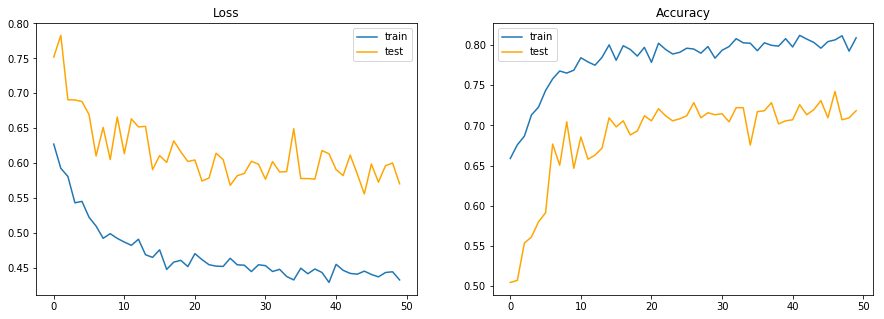

In [9]:
plot_learning_curves(history)

In [10]:
# evaluate model
_, acc = model1.evaluate_generator(test_it, steps=len(test_it), verbose=2)
print(f'Accuracy: {acc*100:.3f}')

Accuracy: 72.579


Not a bad start, we have reached a fair level of accuracy despite the simplicity of the built neural network.

Let's build a deeper network by adding some convolutional layers

### Step 3. Build a less stupid CNN Architecture

In [0]:
from keras import backend as K
K.clear_session()

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='normal', 
                  padding='same', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='normal', 
                  padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='normal', 
                  padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='normal', 
                  padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='normal', 
                  padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='normal', 
                  padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='normal', 
                  padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))
model2.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9, decay=1e-2, nesterov=True)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# fit model
history = model2.fit_generator(train_it, steps_per_epoch=len(train_it),
                               validation_data=test_it, validation_steps=len(test_it), 
                               epochs=50, verbose=2)

Epoch 1/50
 - 21s - loss: 0.6246 - acc: 0.6719 - val_loss: 0.7297 - val_acc: 0.4931
Epoch 2/50
 - 20s - loss: 0.5704 - acc: 0.6879 - val_loss: 0.6477 - val_acc: 0.6591
Epoch 3/50
 - 22s - loss: 0.4500 - acc: 0.8088 - val_loss: 0.6647 - val_acc: 0.6604
Epoch 4/50
 - 21s - loss: 0.4273 - acc: 0.8103 - val_loss: 0.5404 - val_acc: 0.7434
Epoch 5/50
 - 20s - loss: 0.4095 - acc: 0.8135 - val_loss: 0.4781 - val_acc: 0.7623
Epoch 6/50
 - 20s - loss: 0.3909 - acc: 0.8322 - val_loss: 0.4646 - val_acc: 0.7698
Epoch 7/50
 - 22s - loss: 0.3779 - acc: 0.8389 - val_loss: 0.4794 - val_acc: 0.7711
Epoch 8/50
 - 21s - loss: 0.3790 - acc: 0.8315 - val_loss: 0.4977 - val_acc: 0.7560
Epoch 9/50
 - 21s - loss: 0.3877 - acc: 0.8315 - val_loss: 0.4619 - val_acc: 0.7862
Epoch 10/50
 - 21s - loss: 0.3536 - acc: 0.8455 - val_loss: 0.4643 - val_acc: 0.7723
Epoch 11/50
 - 22s - loss: 0.3646 - acc: 0.8406 - val_loss: 0.4748 - val_acc: 0.7660
Epoch 12/50
 - 21s - loss: 0.3465 - acc: 0.8561 - val_loss: 0.4333 - val_a

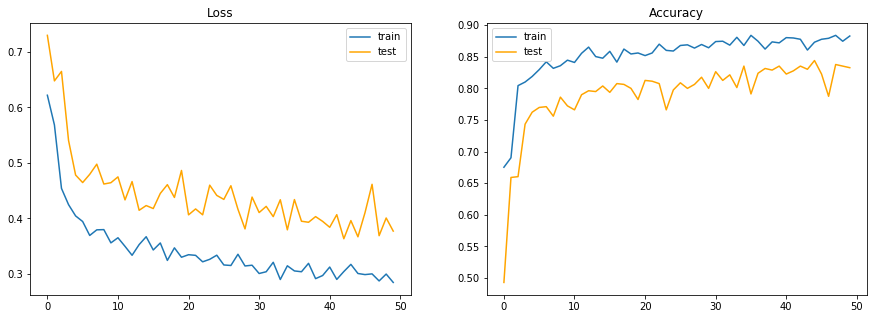

In [17]:
plot_learning_curves(history)

In [18]:
# evaluate model
_, acc = model2.evaluate_generator(test_it, steps=len(test_it), verbose=2)
print(f'Accuracy: {acc*100:.3f}')

Accuracy: 82.893


### Step 4. Transfer Learning

It would seem that the results have improved a bit. As a further step to improve performance we could use better data agumentation and regularization techniques, we could also try to further increase the levels of the neural network, etc ...
How boring...

Let's move on to something much more fun!
We will do __Transfer Learning using a ResNet50!__

    Transfer learning is the improvement of learning in a new task through the transfer of knowledge from a related task that has already been learned.

We will practically use the lower levels of a ResNet50 network, previously trained on the ImageNet dataset, to transfer knowledge about low-level features, and force the neural network to only train the last levels on our new classes.

Bio:
 - [ResNet](https://arxiv.org/abs/1512.03385)
 - [Transfer Learning](http://cs231n.github.io/transfer-learning/)
 
_RECALL: We are using a pre-trained network on an ImageNet dataset, whose input images have size 224x224, from this the reshape of our dataset images 
to this resoluton ;)_

In [0]:
from keras import backend as K
K.clear_session()

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input

from keras.models import Model

model3 = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in model3.layers:
    layer.trainable = False

flat = Flatten()(model3.layers[-1].output)
dense = Dense(128, activation='relu', kernel_initializer='normal')(flat)
output = Dense(1, activation='sigmoid')(dense)

model3 = Model(inputs=model3.inputs, outputs=output)

opt = SGD(lr=0.01, momentum=0.9, decay=1e-2, nesterov=True)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Before starting training the new network we need to make some considerations about the input. The ResNet network we are using uses the weights trained on the ImageNet dataset, and therefore we need a further preprocessing step of our dataset. For this purpose we use the preprocess_input function, whose aim is to scale the input images according to ImageNet ones, directly in the imagedatagenerator removing the previous scaling used.


In [39]:
# create data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# prepare iterators
train_it = train_datagen.flow_from_directory('train', class_mode='binary', 
                                             batch_size=64, target_size=(224, 224))
test_it = test_datagen.flow_from_directory('test', class_mode='binary', 
                                           batch_size=64, target_size=(224, 224))
len(train_it), len(test_it)

Found 1937 images belonging to 2 classes.
Found 795 images belonging to 2 classes.


(31, 13)

In [40]:
# fit model
history = model3.fit_generator(train_it, steps_per_epoch=len(train_it),
                               validation_data=test_it, validation_steps=len(test_it), 
                               epochs=50, verbose=2)

Epoch 1/50
 - 28s - loss: 3.3816 - acc: 0.7557 - val_loss: 2.6722 - val_acc: 0.8252
Epoch 2/50
 - 23s - loss: 2.2017 - acc: 0.8517 - val_loss: 3.5250 - val_acc: 0.7711
Epoch 3/50
 - 24s - loss: 1.9294 - acc: 0.8677 - val_loss: 2.2468 - val_acc: 0.8528
Epoch 4/50
 - 23s - loss: 1.7982 - acc: 0.8799 - val_loss: 3.8016 - val_acc: 0.7535
Epoch 5/50
 - 23s - loss: 2.2100 - acc: 0.8527 - val_loss: 5.7853 - val_acc: 0.6302
Epoch 6/50
 - 24s - loss: 1.7418 - acc: 0.8825 - val_loss: 3.4952 - val_acc: 0.7736
Epoch 7/50
 - 23s - loss: 1.7237 - acc: 0.8830 - val_loss: 4.0565 - val_acc: 0.7346
Epoch 8/50
 - 23s - loss: 1.7193 - acc: 0.8855 - val_loss: 2.5384 - val_acc: 0.8403
Epoch 9/50
 - 23s - loss: 1.5679 - acc: 0.8973 - val_loss: 3.9327 - val_acc: 0.7497
Epoch 10/50
 - 23s - loss: 1.4364 - acc: 0.9042 - val_loss: 3.1743 - val_acc: 0.7975
Epoch 11/50
 - 23s - loss: 1.4931 - acc: 0.9005 - val_loss: 3.0068 - val_acc: 0.8050
Epoch 12/50
 - 24s - loss: 1.3836 - acc: 0.9074 - val_loss: 4.3186 - val_a

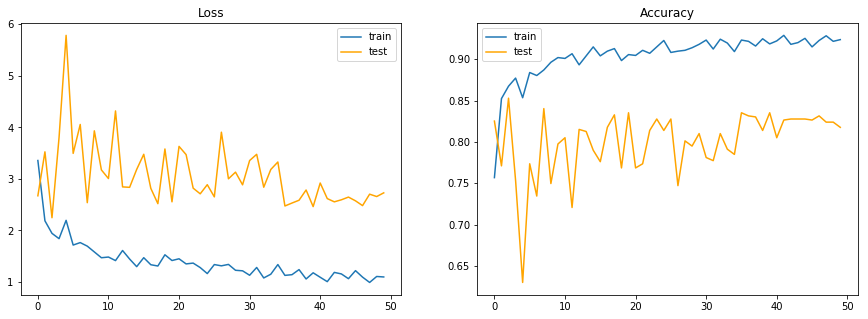

In [41]:
plot_learning_curves(history)

In [43]:
# evaluate model
_, acc = model3.evaluate_generator(test_it, steps=len(test_it), verbose=2)
print(f'Accuracy: {acc*100:.3f}')

Accuracy: 83.774


In [0]:
# save model
model3.save('final_model.h5')

As you can see the improvement is small, but we improved our network! 

Furthermore we can see that the neural network already learns from the first epochs reaching more than 80% accuracy. As further steps we could try to tune the learning rate. but honestly we can accept the results we have obtained as very good since we have used a very small dataset.

### Step 5. Test

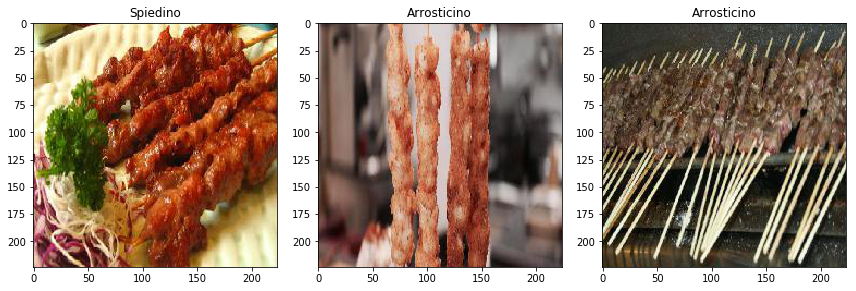

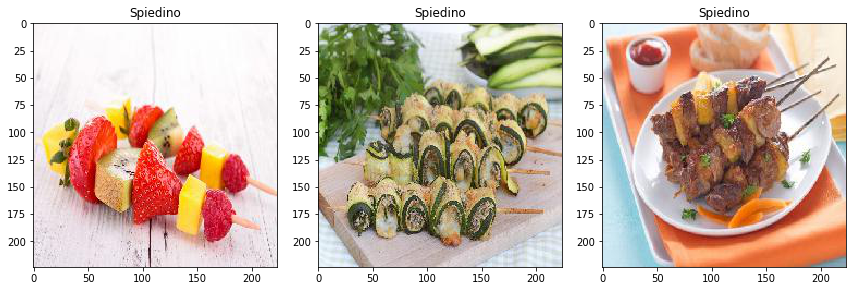

In [93]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input


# load model
final_model = load_model('final_model.h5')

classes = ['Arrosticino', 'Spiedino']

plt.figure(figsize=(12,7))
for i in range(3):
    plt.subplot(131 + i)
    filename = np.random.choice(os.listdir('test/arrosticino'))
    img = img_to_array(load_img('test/arrosticino/'+filename))
    img = img.reshape(1, 224, 224, 3)
    img = preprocess_input(img)
    pred = final_model.predict(img)
    plt.title(classes[int(np.round(pred[0][0]))])
    image = imread(os.path.join('test/arrosticino', filename))
    plt.imshow(image)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,7))
for i in range(3):
    plt.subplot(131 + i)
    filename = np.random.choice(os.listdir('test/spiedino'))
    img = img_to_array(load_img('test/spiedino/'+filename))
    img = img.reshape(1, 224, 224, 3)
    img = preprocess_input(img)
    pred = final_model.predict(img)
    plt.title(classes[int(np.round(pred[0][0]))])
    image = imread(os.path.join('test/spiedino', filename))
    plt.imshow(image)
plt.tight_layout()
plt.show()

As conclusions we can be very satisfied with the results obtained and ... buona arrostata!!!